In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, uniform

In [2]:
Beta0, Beta1, Beta2, Beta3 = 5, 0.5, 0.5, -0.02
Sigma = 0.5

N = 50

np.random.seed(111)
XSample = uniform.rvs(0, 20, size=N)
XSample.sort()

Epsilon = norm.rvs(0, Sigma, size=N)

YSample = Beta0 + Beta1 * XSample + Beta2 * np.sin(XSample) + Beta3 * (XSample -5)**2 + Epsilon

In [3]:
Dat = pd.DataFrame({"Y": YSample, "X":XSample})

<Axes: xlabel='X', ylabel='Y'>

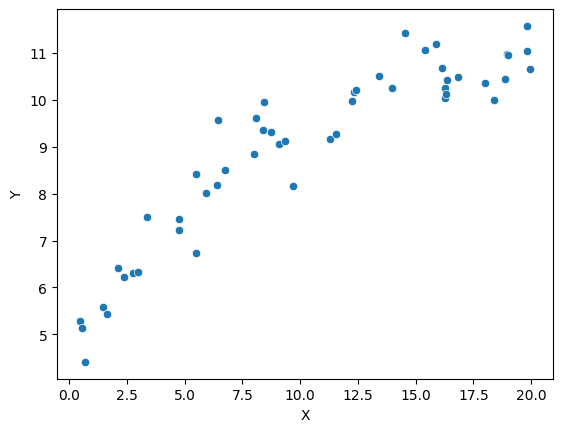

In [4]:
sns.scatterplot(data=Dat, x="X", y="Y")

---

In [5]:
RegModel = smf.ols(data=Dat, formula="Y ~ X + np.sin(X) + I((X-5)**2)")
RegModelFit = RegModel.fit()

In [6]:
RegModelFit.summary2(alpha=0.11)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.938   
Dependent Variable: Y                AIC:                71.5773 
Date:               2024-10-07 13:42 BIC:                79.2254 
No. Observations:   50               Log-Likelihood:     -31.789 
Df Model:           3                F-statistic:        249.9   
Df Residuals:       46               Prob (F-statistic): 1.79e-28
R-squared:          0.942            Scale:              0.22697 
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.055  0.945]
-----------------------------------------------------------------
Intercept          5.0038   0.1727 28.9787 0.0000  4.7224  5.2852
X                  0.5053   0.0265 19.0367 0.0000  0.4620  0.5485
np.sin(X)          0.3910   0.1102  3.5474 0.0009  0.2114  0.5706
I((X - 5) ** 2)   -0.0201   0.0022 -9.0805 0.0000 -0.0237 -0.0165
-----------------------------------------------------------------
Omnibus:              2.428        Durbin-Watson:           1.762
Prob(Omnibus):        0.297        Jarque-Bera (JB):        1.499
Skew:                 0.273        Prob(JB):                0.473
Kurtosis:             3.649        Condition No.:           264  
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [7]:
HatSigma = np.sqrt(RegModelFit.mse_resid)
HatSigma

0.47641079326788643

Get confidence and prediction intervals

In [8]:
PredictionTable = RegModelFit.get_prediction().summary_frame(alpha=0.11)

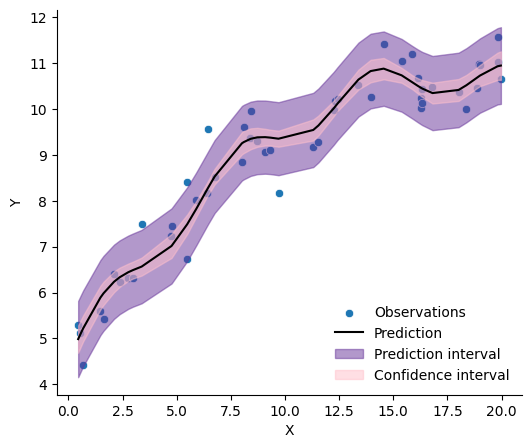

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))

# Scatterplot of the observations
sns.scatterplot(
    data=Dat,
    x="X",
    y="Y",
    ax=ax,
    label="Observations"
)

# Plot predicted mean
ax.plot(
    XSample,
    PredictionTable["mean"],
    color="k",
    label="Prediction"
)

# Plot prediction interval
ax.fill_between(
    XSample,
    PredictionTable["obs_ci_lower"],
    PredictionTable["obs_ci_upper"],
    color="rebeccapurple",
    alpha=0.5,
    label="Prediction interval"
)

# Plot confidence interval
ax.fill_between(
    XSample,
    PredictionTable["mean_ci_lower"],
    PredictionTable["mean_ci_upper"],
    color="pink",
    alpha=0.5,
    label="Confidence interval"
)

ax.legend(frameon=False)
ax.spines[['right', 'top']].set_visible(False)

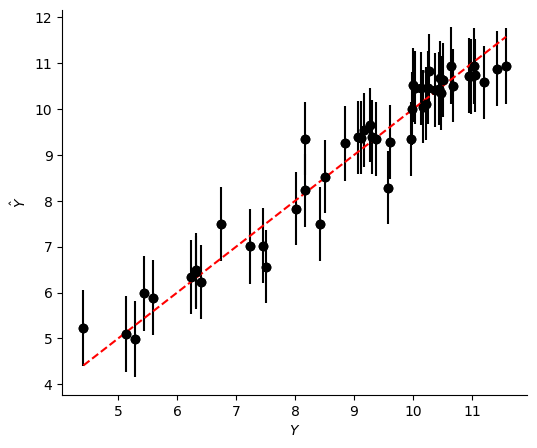

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.scatter(YSample, PredictionTable["mean"], color="k")

ax.errorbar(
    YSample,
    PredictionTable["mean"],
    yerr=PredictionTable["obs_ci_upper"] - PredictionTable["mean"],
    fmt="o",
    color="k"
)

ax.plot(
    [YSample.min(), YSample.max()]
    , [YSample.min(), YSample.max()]
    , color='r'
    , linestyle='--'
)

ax.set_xlabel(r"$Y$")
ax.set_ylabel(r"$\hat{Y}$")
ax.spines[['right', 'top']].set_visible(False)

We create a new dataset with several values of $X$ to get a better graph

In [11]:
XPlot = np.linspace(0,20,100)
DfPlot = pd.DataFrame({"X": XPlot})

PredictionTable = RegModelFit.get_prediction(DfPlot["X"]).summary_frame(alpha=0.11)

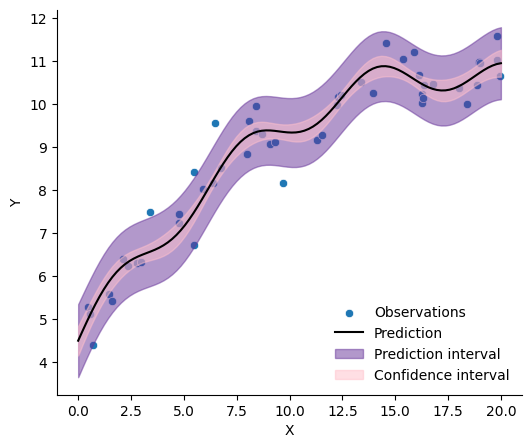

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))

# Scatterplot of the observations
sns.scatterplot(
    data=Dat,
    x="X",
    y="Y",
    ax=ax,
    label="Observations"
)

# Plot predicted mean
ax.plot(
    XPlot,
    PredictionTable["mean"],
    color="k",
    label="Prediction"
)

# Plot prediction interval
ax.fill_between(
    XPlot,
    PredictionTable["obs_ci_lower"],
    PredictionTable["obs_ci_upper"],
    color="rebeccapurple",
    alpha=0.5,
    label="Prediction interval"
)

# Plot confidence interval
ax.fill_between(
    XPlot,
    PredictionTable["mean_ci_lower"],
    PredictionTable["mean_ci_upper"],
    color="pink",
    alpha=0.5,
    label="Confidence interval"
)

ax.legend(frameon=False)
ax.spines[['right', 'top']].set_visible(False)